# Draw

There are two usual methods for light waves polarization representation: polarization ellipse and Poincaré sphere.

In [2]:
import numpy as np
from py_pol.jones_vector import Jones_vector, degrees
from py_pol.stokes import Stokes

## Polarization ellipse

### Pure states

The trajectory of the electric field vector of pure (totally polarized) light waves is an ellipse. This ellipse is often used to represent polarization states, as it allows identifying easily some of its properties. *py_pol* has a method in *Jones_vector* and *Stokes* classes to plot the polarization ellipses: *draw_ellipse*.

Circular light = 
[+1.000 + +0.000j]   
[+0.000 + +1.000j]   



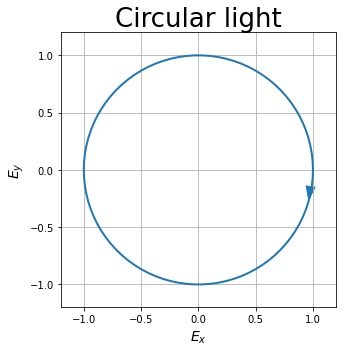

In [2]:
J = Jones_vector('Circular light')
J.circular_light(intensity=2, kind='r')
print(J)
axis, fig = J.draw_ellipse(draw_arrow=True, figsize=(5,5))

Same for Stokes objects.

Circular light = 
[+2.000]   
[+0.000]   
[+0.000]   
[+2.000]   



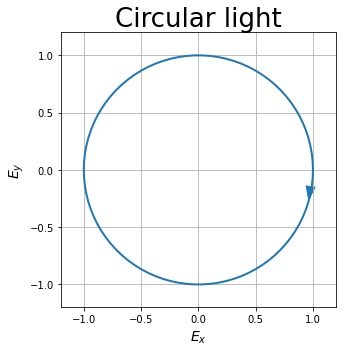

In [3]:
S = Stokes('Circular light')
S.circular_light(intensity=2, kind='r')
print(S)
axis, fig = S.draw_ellipse(draw_arrow=True, figsize=(5,5))

### Plot multiple ellipses in a single plot

*py_pol* objects may have more than one element stored inside. The most basic method of representation consists on plotting all the ellipses in the same figure:

(<Figure size 432x432 with 1 Axes>,
 [<AxesSubplot:title={'center':'Elliptical light'}, xlabel='$E_x$', ylabel='$E_y$'>])

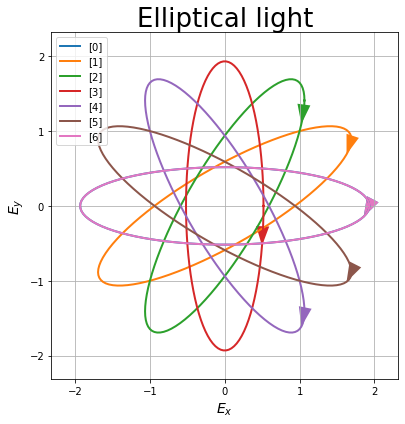

In [4]:
# It is the same for Stokes class
S = Stokes('Elliptical light')
angles = np.linspace(0, 180*degrees, 7)
S.general_azimuth_ellipticity(amplitude=2, azimuth=angles, ellipticity=15*degrees)
S.draw_ellipse(draw_arrow=True, figsize=(6, 6))

### Plot several ellipses in multiple plots

It is possible to divide the plots into several ones using the *subplots* argument. The first option is INDIVIDUAL, which represents each ellipse in its own subplot. These subplots are represented in a square grid (or the closest to a square grid, depending on the number of elements of the object):

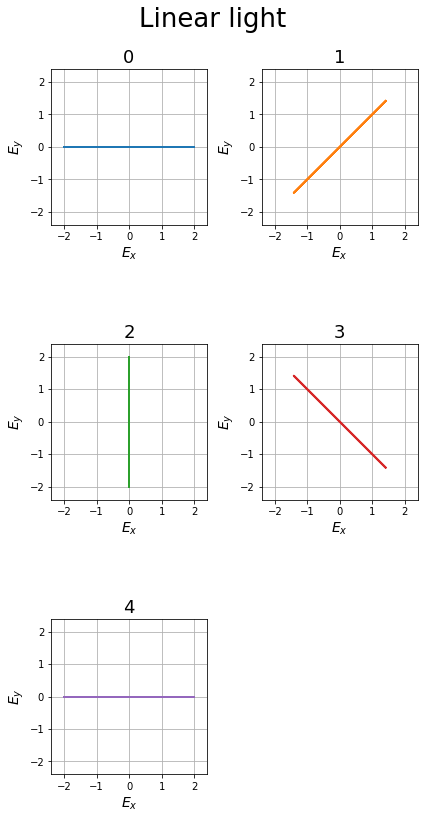

In [5]:
J = Jones_vector('Linear light')
angles = np.linspace(0, 180*degrees, 5)
J.linear_light(amplitude=2, azimuth=angles)
_ = J.draw_ellipse(draw_arrow=True, subplots='Individual', figsize=(6, 12))

The second option is AS_SHAPE, which uses the shape of the object. 1D objects will be plotted as a row array of plots with one ellipse in each subplot. 2D arrays will be plotted as a matrix array with the same shape as the object. Objects of higher dimensionality will be plotted as a matrix array with the shape of the two first dimensions, plotting more than one ellipse per subplot.

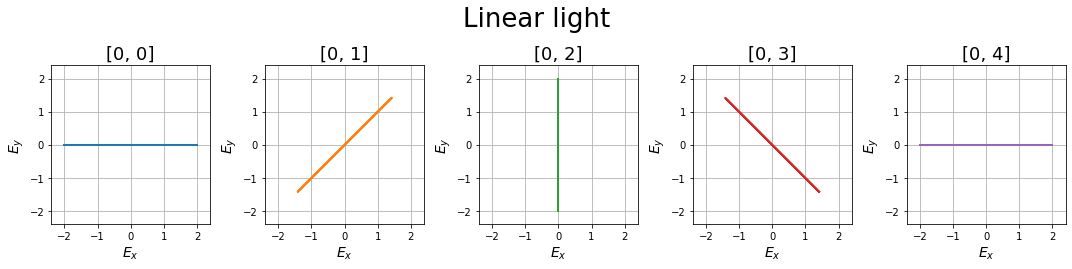

In [6]:
# 1D object
J = Jones_vector('Linear light')
angles = np.linspace(0, 180*degrees, 5)
J.linear_light(amplitude=2, azimuth=angles)
_ = J.draw_ellipse(draw_arrow=True, subplots='As_shape', figsize=(15, 4))

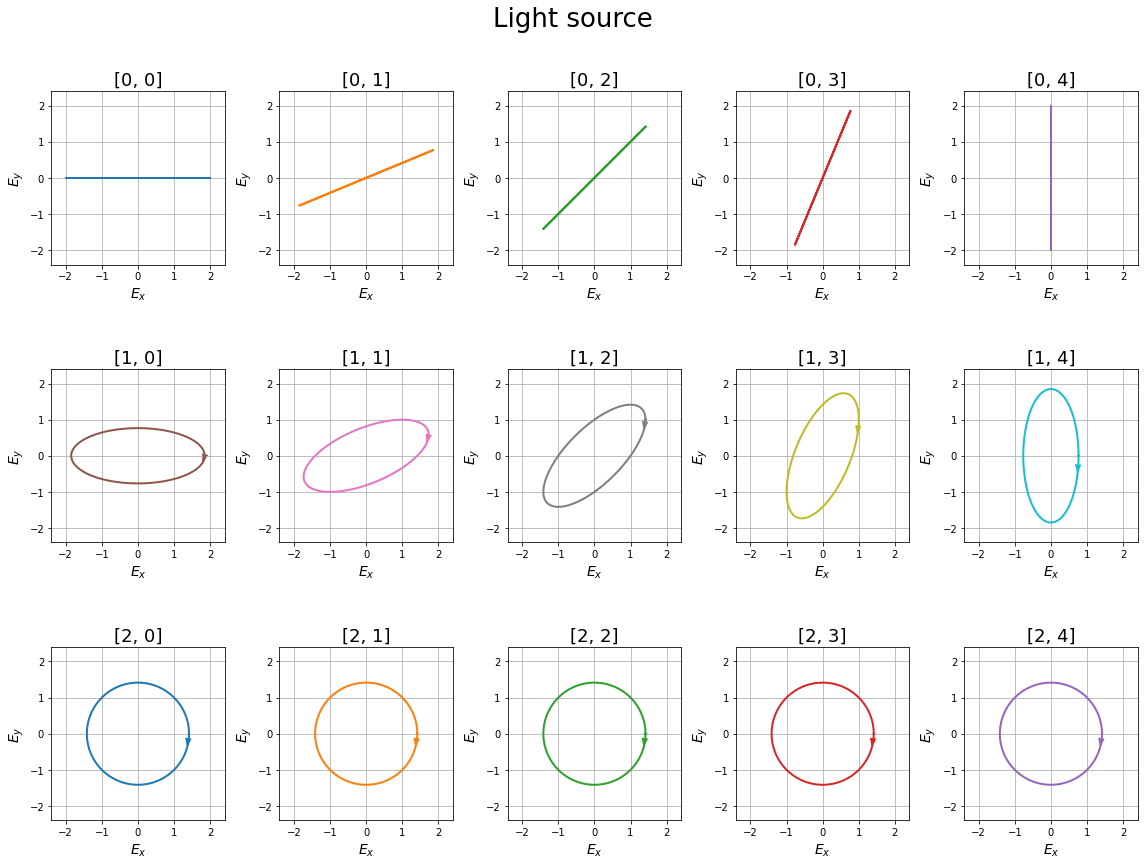

In [7]:
# 2D object
J = Jones_vector('Light source')
az = np.linspace(0, 90*degrees, 5)
el = np.linspace(0, 45*degrees, 3)
AZ, EL = np.meshgrid(az, el)
J.general_azimuth_ellipticity(amplitude=2, azimuth=AZ, ellipticity=EL)
_ = J.draw_ellipse(draw_arrow=True, subplots='as_shape', figsize=(16, 13))

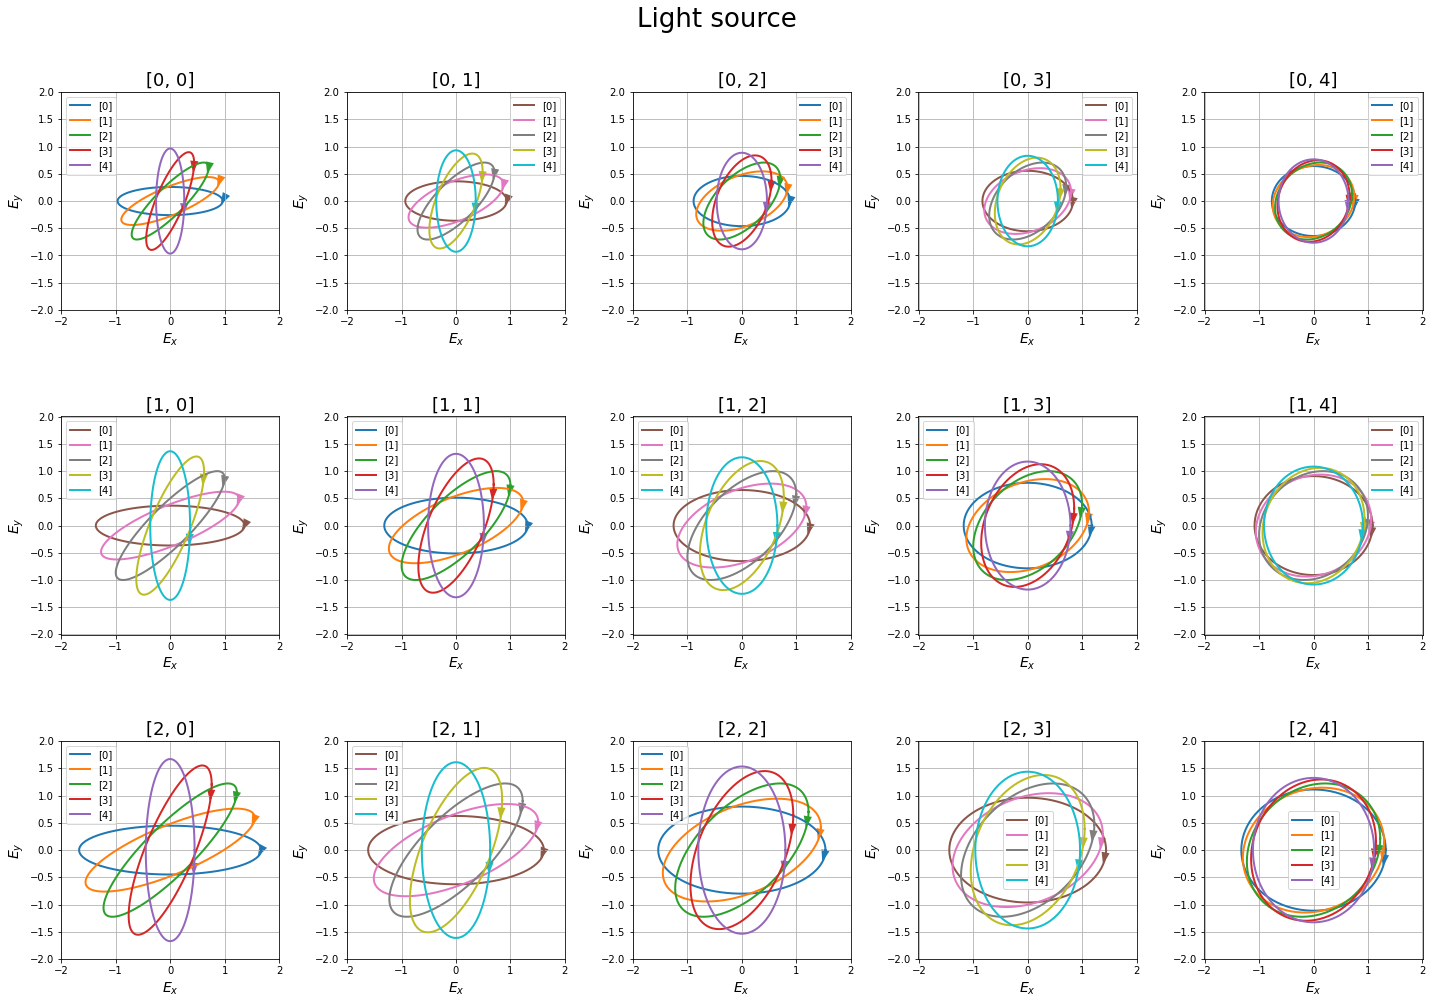

In [8]:
# Higher dimensionality object
J = Jones_vector('Light source')
angles = np.linspace(0, 90*degrees, 5)
ell = np.linspace(15, 40, 5)*degrees
intensity = np.linspace(1, 3, 3)
Ell, I, Angles = np.meshgrid(ell, intensity, angles)
J.general_azimuth_ellipticity(azimuth=Angles, ellipticity=Ell, intensity=I)
_ = J.draw_ellipse(draw_arrow=True, depol_central=True, subplots='as_shape', figsize=(20, 15))

Finally, it is possible to give the method a 2-element tuple as the desired shape.

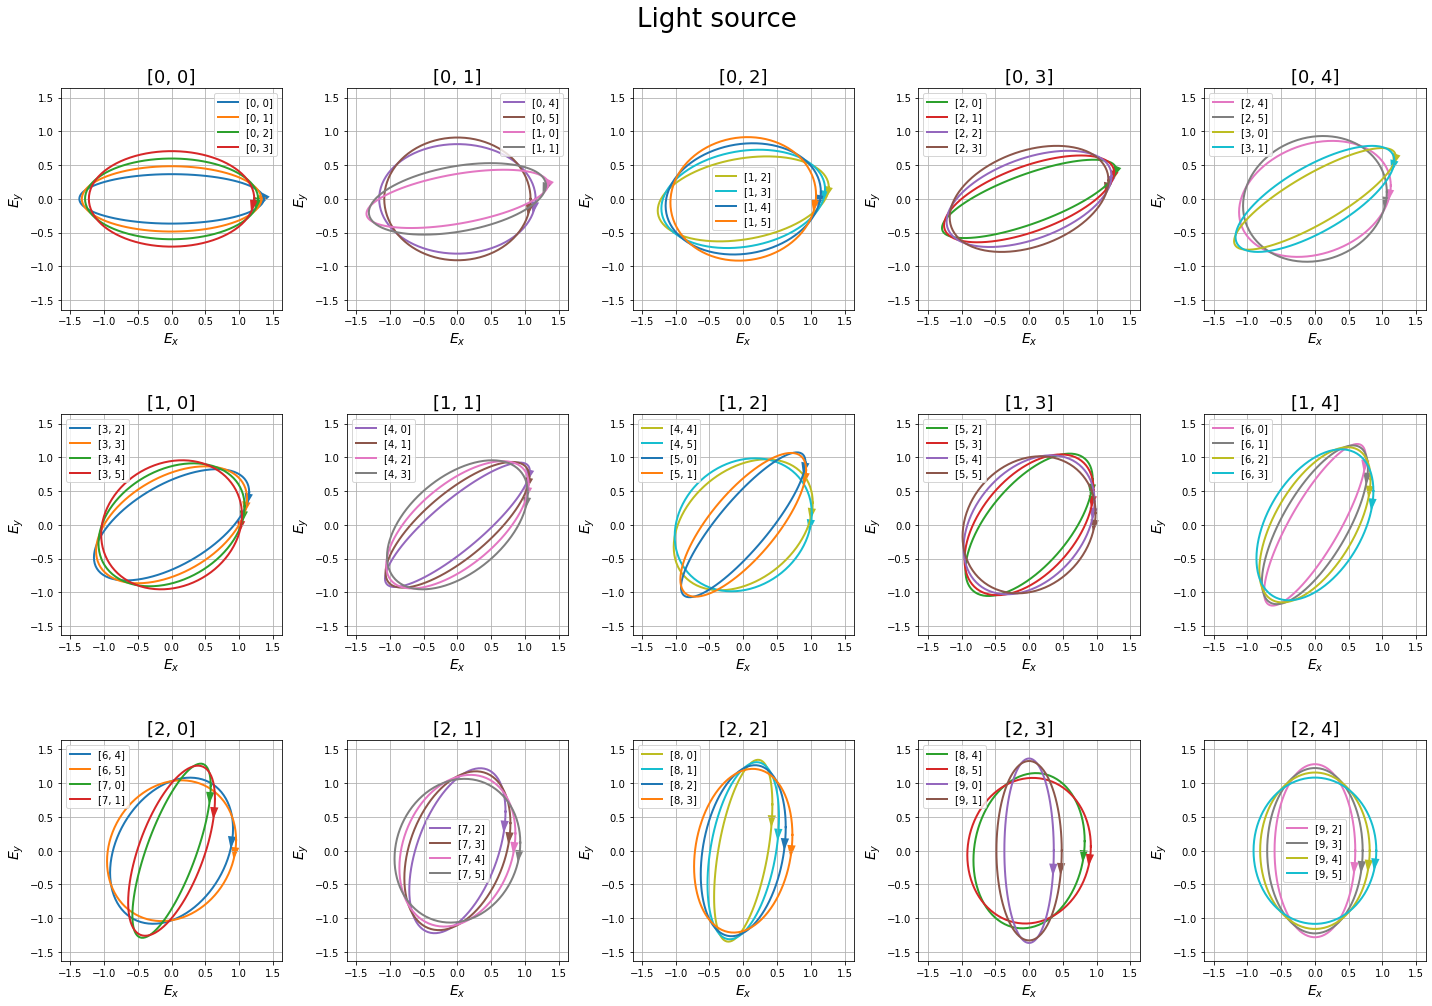

In [9]:
J = Jones_vector('Light source')
angles = np.linspace(0, 90*degrees, 10)
ell = np.linspace(15, 40, 6)*degrees
Ell, Angles = np.meshgrid(ell, angles)
J.general_azimuth_ellipticity(azimuth=Angles, ellipticity=Ell, intensity=2)
_ = J.draw_ellipse(draw_arrow=True, depol_central=True, subplots=(3,5), figsize=(20, 15))

### Plot partially polarized states

Partially polarized states can be decomposed in a totally polarized state plus a totally depolarized state. The totally unpolarized light electric field vector position will be random, with its module dependent on the unpolarized intensity. Then, the total electric field will be the coherent sum of both fields. 

*py_pol* can plot partially polarized states in three different ways. The first one is plotting at the same time the totally polarized part ellipse and the circle whose radius is the expected electric field amplitude of the unpolarized part. This is done by setting the *depol_central* argument as True.

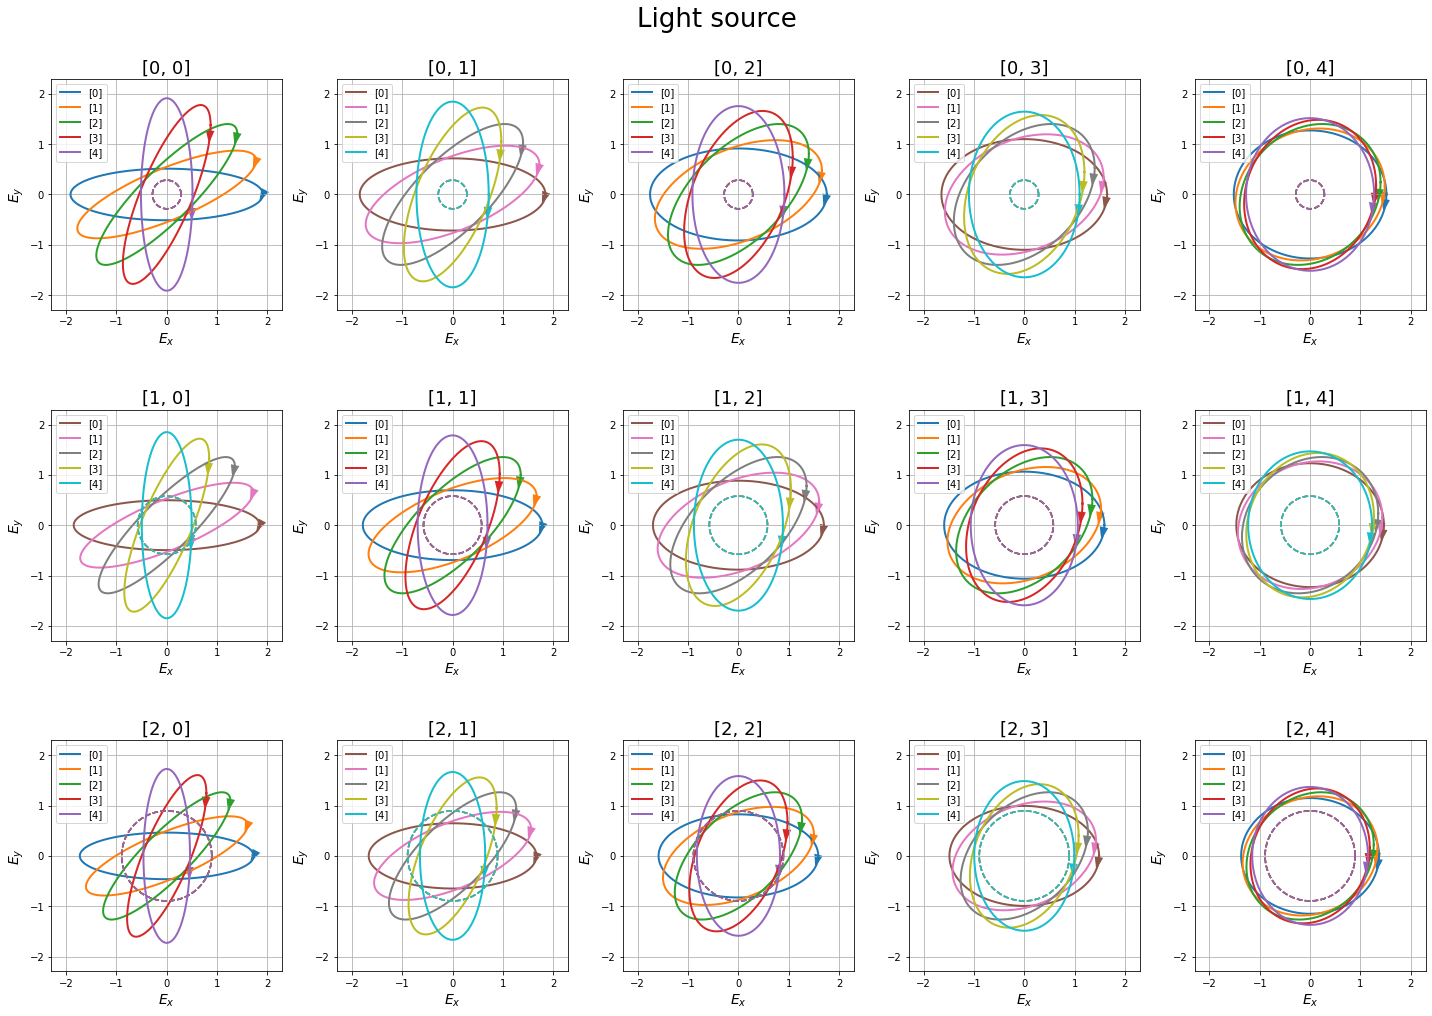

In [10]:
S = Stokes('Light source')
angles = np.linspace(0, 90*degrees, 5)
ell = np.linspace(15, 40, 5)*degrees
deg = np.linspace(0.2, 0.6, 3)
Ell, Deg, Angles = np.meshgrid(ell, deg, angles)
S.general_azimuth_ellipticity(amplitude=2, azimuth=Angles, ellipticity=Ell, degree_depol=Deg)
# print(J)
_ = S.draw_ellipse(draw_arrow=True, depol_central=True, subplots='as_shape', figsize=(20, 15))

The second way is plotting the ellipses which outline the region with a certain probability of finding the total electric field vector. This is done by setting the *depol_contour* argument as True. The argument *contour_levels* contains the probability levels which the lines contain. If several ones are used, several lines will be plotted.

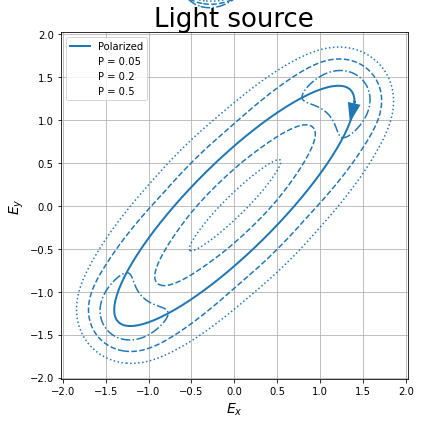

In [11]:
S = Stokes('Light source')
S.general_azimuth_ellipticity(amplitude=2, azimuth=45*degrees, ellipticity=15*degrees, degree_depol=0.2)
_ = S.draw_ellipse(draw_arrow=True, depol_contour=True, contour_levels=(0.05, 0.2, 0.5,))

The last method is plotting the probability distribution of the electric field. This is done by setting the *depol_prob* argument to True. The colormap of the probability distribution is varied using the *cmap* argument.

**NOTE:** This possibility forces the INDIVIDUAL option of subplots.

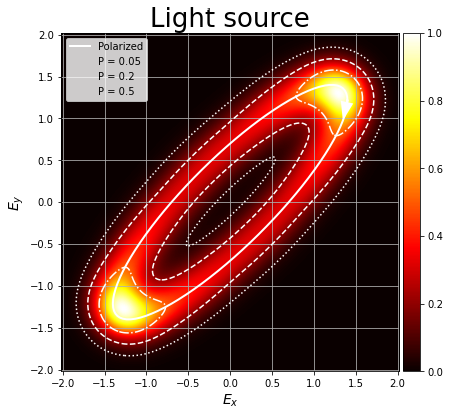

In [12]:
S = Stokes('Light source')
S.general_azimuth_ellipticity(amplitude=2, azimuth=45*degrees, ellipticity=15*degrees, degree_depol=0.2)
_ = S.draw_ellipse(draw_arrow=True, depol_prob=True, depol_contour=True, contour_levels=(0.05, 0.2, 0.5,))

### Save the figure as an image file

Finally, it is possible to save the figures if a valid file name is given to the *filename* argument.

Image Subplots figure.jpg saved succesfully!


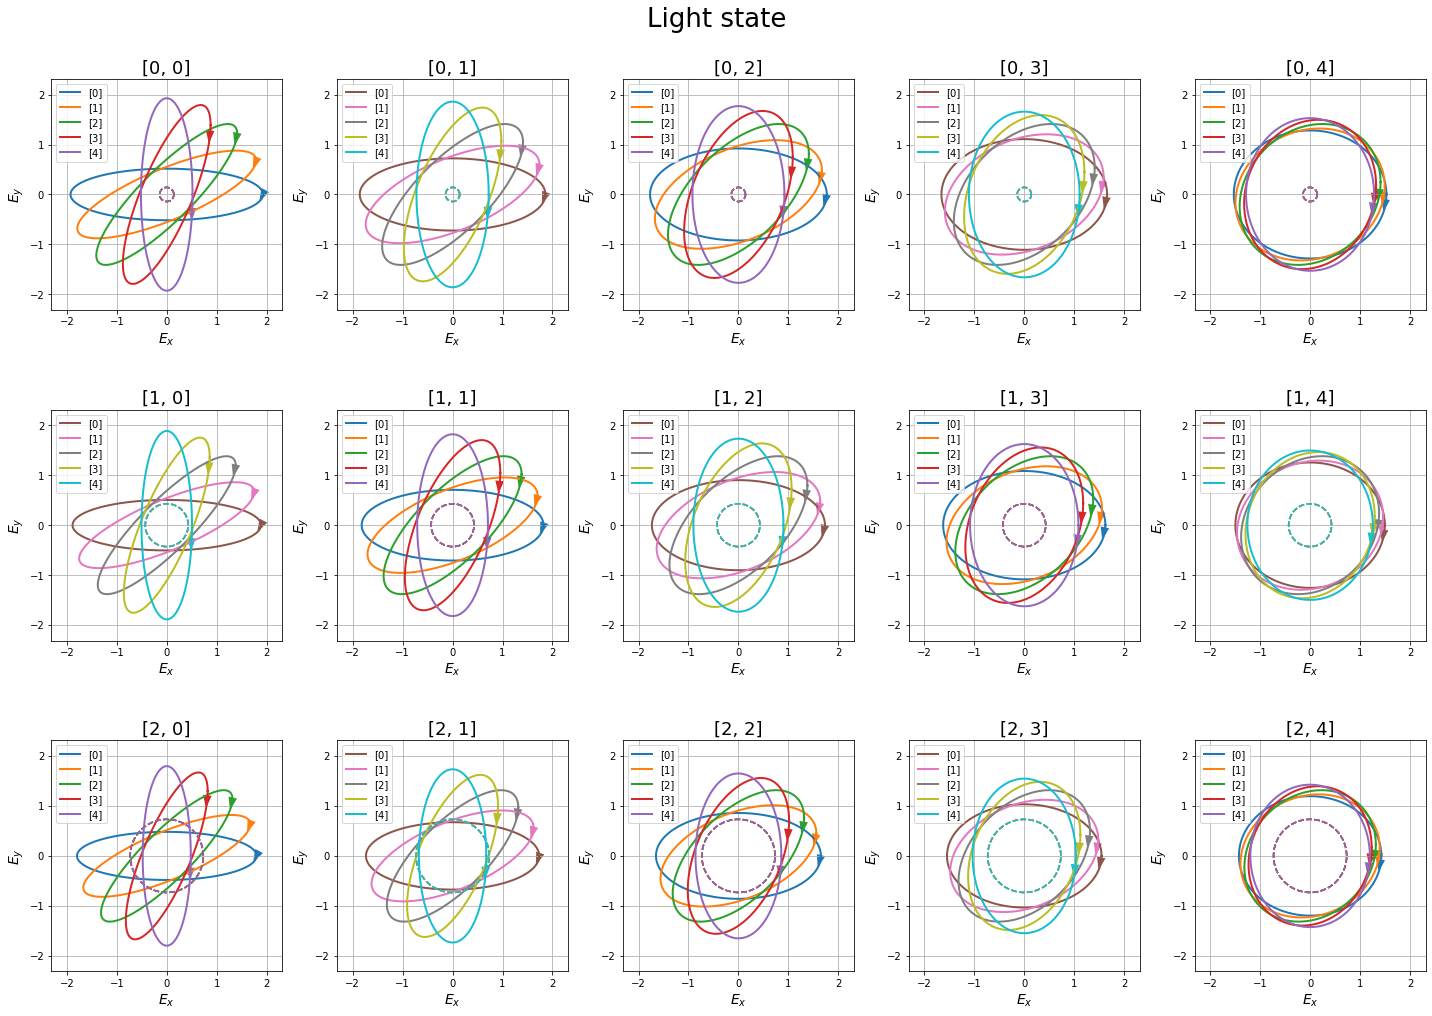

In [13]:
S = Stokes('Light state')
angles = np.linspace(0, 90*degrees, 5)
ell = np.linspace(15, 40, 5)*degrees
deg = np.linspace(0.1, 0.5, 3)
Ell, Deg, Angles = np.meshgrid(ell, deg, angles)
S.general_azimuth_ellipticity(amplitude=2, azimuth=Angles, ellipticity=Ell, degree_depol=Deg)
# print(J)
_ = S.draw_ellipse(draw_arrow=True, depol_central=True, subplots='as_shape', figsize=(20, 15), filename='Subplots figure.jpg')

## Poincaré sphere

The second representation method is using the Poincaré sphere. Each Stokes vector can be represented in a sphere using $S_1$, $S_2$ and $S_3$ as $x$, $y$ and $z$ coordinates (noralized to $S_0 = 1$). Pure states represent the surface of the wphere, the origin of the sphere for a totally depolarized state (natural light), and the rest of the sphere volume correspond to partially polarized light.

A *Stokes* and *Jones_vector*object can be plotted in a Poincaré sphere using the *draw_poincare* method.

**New in version 1.1.2**: Poincaré sphere representation has been changed from Matplotlib to Pyplot.

**Note:** Sphinx and nbsphinx have some problems saving Plotly figures in the htmlfiles of the documentation. In order to show the figures, some png files were saved and plotted in the documentation instead of proper interactive Plotly figures. In all cases, the code line responsible of rendering the figure is commented and the figure included as image.

In [2]:
S = Stokes('Linear light')
S.linear_light(azimuth=0)
print(S)
# S.draw_poincare()

Linear light = 
[+1.000]   
[+1.000]   
[+0.000]   
[+0.000]   



<img src="Plotly_1.png" >

By default, all states are represented on the surface of the Poincaré sphere. In order to plot depolarized states inside the sphere, the *depol* argument must be set to True.

In [3]:
S = Stokes('Linear light')
S.linear_light(azimuth=0, degree_pol=0.5)
fig = S.draw_poincare(depol=True)
# fig.show()

<img src="Plotly_2.png" >

The figure size may be varied using the *figsize* argument. This argument must be a (width, height) tuple where the size is given in hundreds of pixels.

The axes and guide lines may be removed from the drawing. Also, it is possible to avoid having to manually show the figure.

In [4]:
S = Stokes('Linear light')
S.linear_light(azimuth=90*degrees)
# fig = S.draw_poincare(figsize=(4,4), draw_axes=False, draw_guides=False, show_fig=True)

Linear light = 
[+1.000 ]   
[-1.000 ]   
[+0.000 ]   
[+0.000 ]   

<img src="Plotly_3.png" >

### Plotting multiple states

Objects with more than one vector can be used. If the object is 1D, a line may be drawn between elements.

In [8]:
S = Stokes('Linear light')
S.general_azimuth_ellipticity(azimuth=np.linspace(0,179*degrees,13), ellipticity=np.linspace(0,45*degrees,13))
fig = S.draw_poincare(kind="scatterline")
# fig.show()

<img src="Plotly_4.png" >

If the object is 2D, several lines are drawn in the same sphere. In this case, the first index of the object will be used to get the lines.

In [6]:
S = Stokes('Light source')
az = np.linspace(0, 179*degrees, 19)
el = np.linspace(0, 44*degrees, 5)
AZ, EL = np.meshgrid(az, el)
S.general_azimuth_ellipticity(amplitude=2, azimuth=AZ, ellipticity=EL)
fig = S.draw_poincare(kind="line")
# fig.show()

<img src="Plotly_5.png" >

If an object has multiple Stokes vectors, the figure may be divided into subplots using the *subplots* argument:

In [10]:
S = Stokes('Light source')
az = np.linspace(0, 179*degrees, 19)
el = np.linspace(0, 44*degrees, 5)
AZ, EL = np.meshgrid(az, el)
S.general_azimuth_ellipticity(amplitude=2, azimuth=AZ, ellipticity=EL)
fig = S.draw_poincare(kind="scatterline", subplots=True, figsize=(15, 3))
# fig.show()

<img src="Plotly_6.png" >

### Plotting parameters

*py_pol* has a powerful option to improve the data representation. By using the *param* argument, we can plot the information of one parameter. This parameter may be a string representing one method of the *Parameters_Stokes* class.

In [11]:
S = Stokes('Linear light')
S.linear_light(azimuth=np.linspace(0,90,5)*degrees, intensity=np.linspace(1,5,5))
fig = S.draw_poincare(kind="scatterline", param='intensity')
# fig.show()

<img src="Plotly_7.png" >

*param* can also be a numpy.ndarray of the same shape as the py_pol object.

In [3]:
S = Stokes('Linear light')
S.linear_light(azimuth=np.linspace(0,90,5)*degrees, intensity=np.linspace(1,5,5))
fig = S.draw_poincare(kind="scatterline", param=S.parameters.intensity())
# fig.show()

<img src="Plotly_8.png" >

Angular parameters may be easily represented in degrees.

In [4]:
S = Stokes('Linear light')
S.linear_light(azimuth=np.linspace(0,90,5)*degrees, intensity=np.linspace(1,5,5))
fig = S.draw_poincare(kind="scatterline", param="azimuth", in_degrees=True)
# fig.show()

<img src="Plotly_9.png" >

The colormap can be varied.

In [5]:
S = Stokes('Linear light')
S.linear_light(azimuth=np.linspace(0,90,5)*degrees, intensity=np.linspace(1,5,5))
fig = S.draw_poincare(kind="scatterline", param="azimuth", in_degrees=True, colormap="viridis")
# fig.show()

<img src="Plotly_10.png" >

Finally, if the object is 2D, a parameter may be represented in surface mode:

In [6]:
S = Stokes('Light source')
az = np.linspace(0, 179.99*degrees, 37)
el = np.linspace(-45*degrees, 45*degrees, 19)
AZ, EL = np.meshgrid(az, el)
S.general_azimuth_ellipticity(amplitude=2, azimuth=AZ, ellipticity=EL)
fig = S.draw_poincare(kind="surf", param="azimuth")
# fig.show()

<img src="Plotly_11.png" >